#  Lead Scoring Case Study

Building a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [2]:
#importing warnings

import warnings
warnings.filterwarnings('ignore')

#### Reading the dataset

In [3]:
lead_df = pd.read_csv('Leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Inspecting the dataset

In [4]:
lead_df.shape

#Dataset has 9240 rows and 37 columns

(9240, 37)

In [5]:
lead_df.info()

#As per the info, there are no null values in the record. However, most of the categorical variables have a record called 'Select' which should be considered as null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#Statistical summary of the numerical columns

lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Preparation

As stated, few cells contains value 'select' which indicates that missing values. Hence replacing the value 'Select' with Nan

In [7]:
#replacing value 'Select' with Nan

lead_df = lead_df.replace('Select',np.nan)

In [8]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


##### Identifying columns with only one unique value and dropping those columns as they don't possess any significance in analysis

In [9]:
#Finding the columns with 1 unique values

lead_unique = lead_df.nunique()
lead_unique[lead_unique == 1].index

Index(['Magazine', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'],
      dtype='object')

From the above observation, could see that columns: 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque' have only 1 unique value which does not add any significance in analysis. Hence dropping the above columns

In [10]:
#Dropping the columns with one unique value

lead_df = lead_df.drop(lead_unique[lead_unique == 1].index, axis = 1)

#### Handling Missing / Null Values

In [11]:
#Reading the null values in the dataset

lead_df.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums          

In [12]:
#Calculating the null values in percentages and identifying columns that has more than 40% null values

null_percent = round(( lead_df.isna().sum() / len(lead_df) ) * 100 , 2)
null_percent[null_percent > 40]

How did you hear about X Education    78.46
Lead Quality                          51.59
Lead Profile                          74.19
Asymmetrique Activity Index           45.65
Asymmetrique Profile Index            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Profile Score            45.65
dtype: float64

##### Dropping the columns that has more than 40% null values.

In [13]:
#Dropping columns with =>40% null values

lead_df = lead_df.drop(null_percent[null_percent > 40].index, axis = 1)

In [14]:
#Checking the null values again

round(( lead_df.isna().sum() / len(lead_df) ) * 100 , 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

#### Observation:
Upon dropping the columns with more than 40% null values, could stil see the columns with significant number of null values in it. Requires further analysis to replace the null with sensible or default value

In [15]:
#Checking the value counts for column: Country

lead_df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

##### From the above observation, we could see that India holds 70.25% records, hence replacing the null values in column "Country" with "India" 

In [16]:
#Replacing null values with "India"

lead_df['Country'] = lead_df['Country'].replace(np.nan,'India')

In [17]:
#Checking value counts for column: What is your current occupation

lead_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

##### Observation: From the above data, could see that most of records in column "What is your current occupation" have value "Unemployed" . Hence, replacing null values with "Unemployed"

In [18]:
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan,lead_df['What is your current occupation'].mode()[0])

In [19]:
#Checking value counts in coluumn: What matters most to you in choosing a course

lead_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

##### Observation: From the above data, we could see that "Better Career Prospects" value holds 70.64% and only 3 records have different value. Replacing those values with  mode of column: Better Career Prospects would leave us with only one unique value. Hence, dropping the column: 'What matters most to you in choosing a course'

In [20]:
lead_df = lead_df.drop('What matters most to you in choosing a course',axis = 1)

In [21]:
#Checking value counts for Lead Source column

lead_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

##### Observation: From the above data, we could observe that most records pertains to "Google". Hence, replacing null values in the column with "Google"

In [22]:
#Replacing null value in column: "Lead Source" with "Google"

lead_df['Lead Source'] = lead_df['Lead Source'].replace( np.nan , lead_df['Lead Source'].mode()[0] )

In [23]:
#Checking value counts for column: "Specialization"

lead_df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

##### Observation: From the above data, we could see that "Finance Management" is present in more records. Hence, replacing the null values in column with "Finance Management"

In [24]:
lead_df["Specialization"] = lead_df['Specialization'].replace( np.nan , lead_df['Specialization'].mode()[0]  )

In [25]:
#Checking the value counts for "Last Activity"

lead_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

##### Observation: From the above data, we could see that "Email Opened" is present in more records. Hence, replacing the null values in column with "Email Opened"

In [26]:
lead_df['Last Activity'] = lead_df['Last Activity'].replace(  np.nan , lead_df['Last Activity'].mode()[0]  )

In [27]:
#Checking the value counts for "Tags" column

lead_df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

##### Observation: From the above data, we could see that "Will revert after reading the email" is present in more records. Hence, replacing the null values in column with "Will revert after reading the email"

In [28]:
lead_df['Tags'] = lead_df['Tags'].replace( np.nan , lead_df['Tags'].mode()[0] )

In [29]:
#Checking the values in City column

lead_df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

##### Observation: From the above data, we could confirm that Mumbai is present in more records. However, looking at the distribution, it would not be advisable to replacing null values with mode of column: Mumbai. Hence, creating a new category:  "Not Available"

In [30]:
lead_df['City'] = lead_df['City'].replace(np.nan,"Not Available")

In [31]:
#Checking the null value percentages

round( (lead_df.isna().sum() / len(lead_df) ) * 100 , 2 )

Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.00
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             0.00
Country                                   0.00
Specialization                            0.00
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
Tags                                      0.00
City         

##### Observation: We could see that there are no null values in most of the column. However, we could see few null values in column: TotalVisits, Page Views Per Visit 

#### Handling outliers

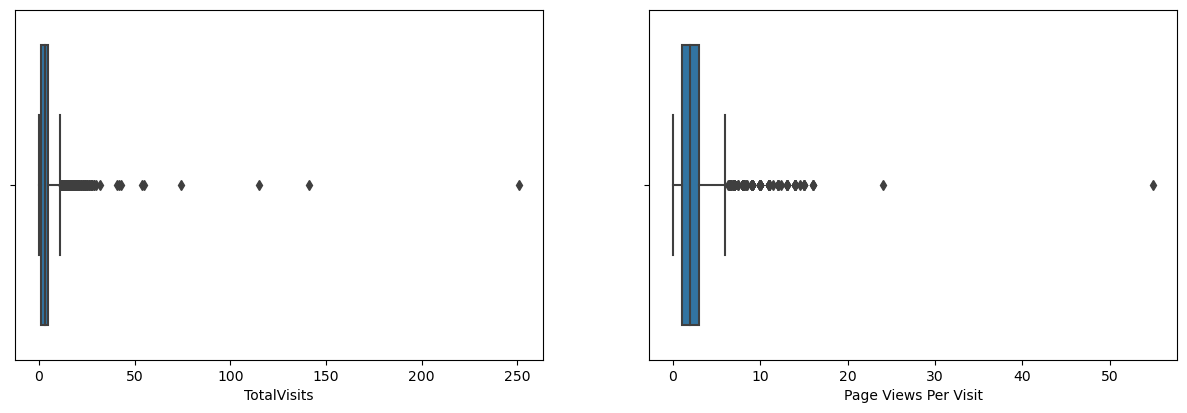

In [32]:
#Checking for the outliers in columns:TotalVisits, Page Views Per Visit

plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.boxplot(x = lead_df['TotalVisits'])
plt.subplot(2,2,2)
sns.boxplot(x = lead_df['Page Views Per Visit'])
plt.show()

##### Observation: We could confirm the presence of outliers in both columns. Hence, imputting the null values in column with median

In [33]:
#Imputting null values with median of column

lead_df['TotalVisits'] = lead_df['TotalVisits'].fillna(lead_df['TotalVisits'].median())
lead_df['Page Views Per Visit'] = lead_df['Page Views Per Visit'].fillna(lead_df['Page Views Per Visit'].median())

In [34]:
#Rechecking the null value percentages

round( (lead_df.isna().sum() / len(lead_df) ) * 100 , 2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Tags                                      0.0
City                              

##### Column: Prospect ID is unique and could be dropped

In [35]:
#Dropping the column: Prospect ID

lead_df.drop(['Prospect ID'], axis = 1, inplace=True)

##### Setting index to Lead Number

In [36]:
#Setting Lead Number as index for the dataframe

lead_df = lead_df.set_index('Lead Number')

#### Plotting the graph for categorical columns

In [37]:
#Extracting the categorical columns for plotting

obj_fields = list(lead_df.loc[:,lead_df.dtypes == np.object].columns)
obj_fields

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

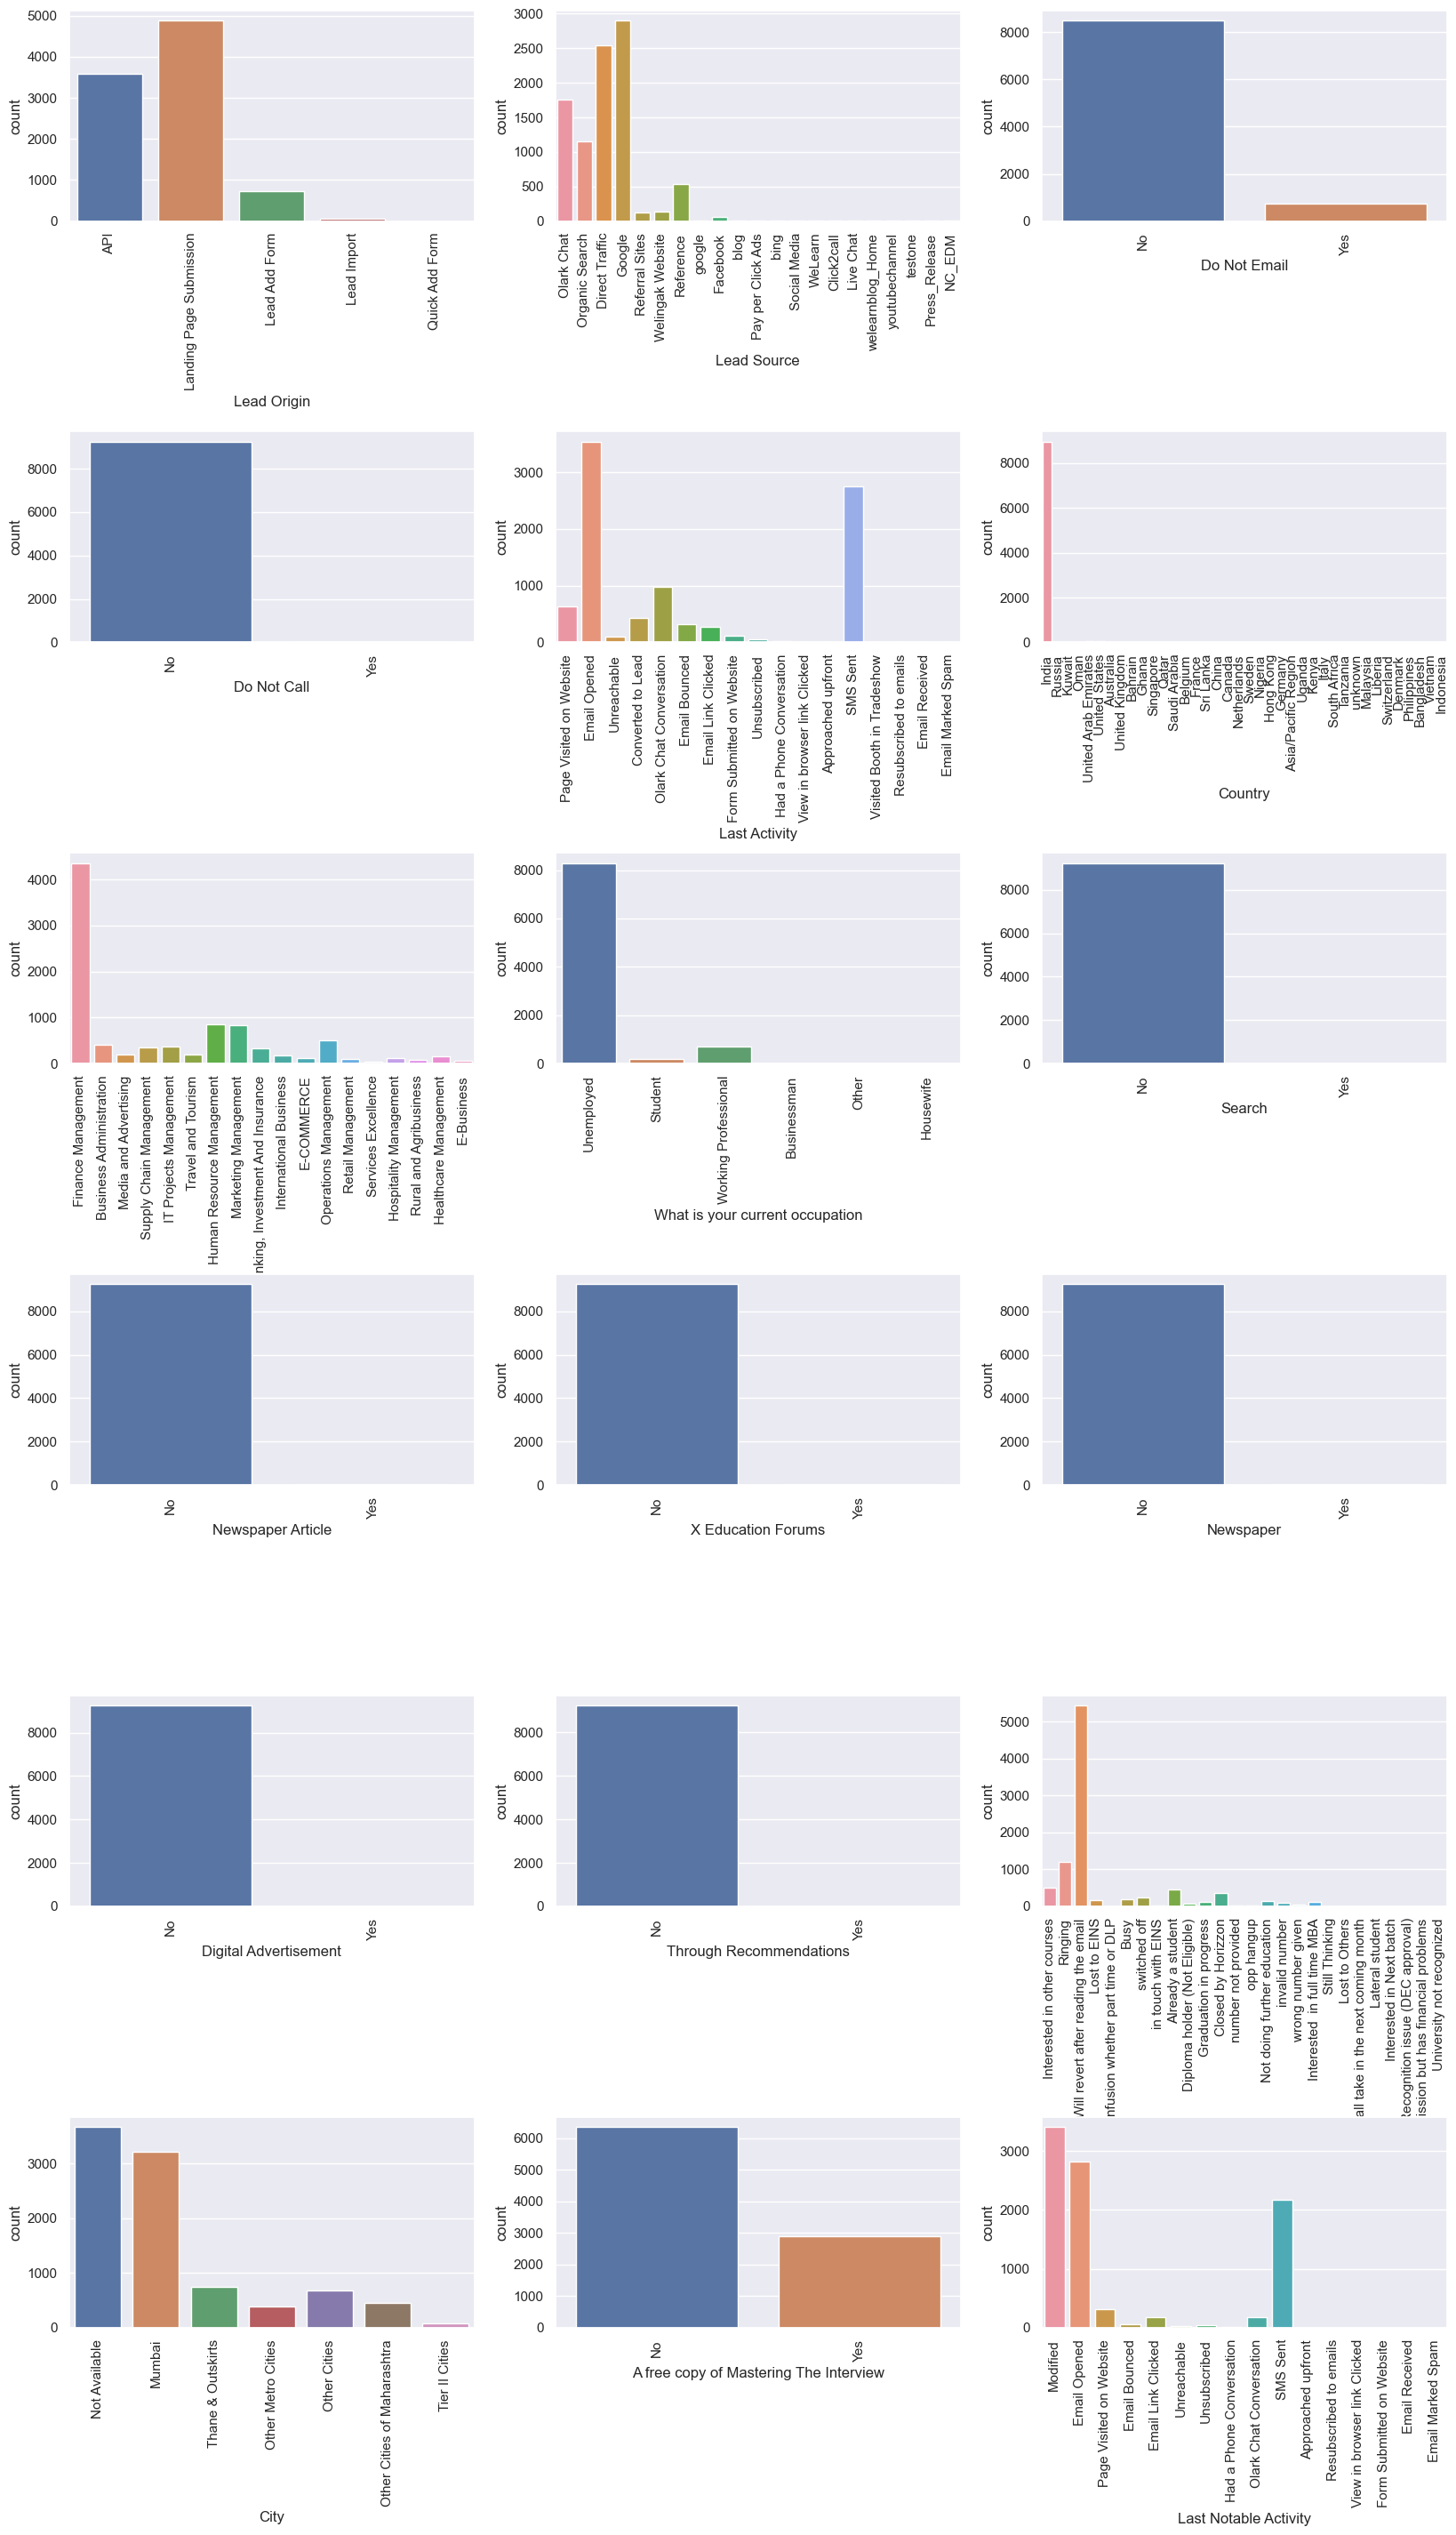

In [38]:
#Plotting countplot for categorical columns to understand the data distribution

plt.figure(figsize=(20,40))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1)
for i in enumerate(obj_fields):
    plt.subplot(7,3,i[0]+1)
    sns.countplot(x = i[1],data=lead_df) 
    plt.xticks(rotation=90)
plt.show()

##### Observation: We could see that are columns which are highly skewed where one value is verh high and other values in column are almost negligible. Hence, dropping those columns

In [39]:
#Dropping the columns: 'What is your current occupation','Do Not Call','Do Not Email','Country','Search','X Education Forums','Newspaper','Newspaper Article','Through Recommendations' & 'Digital Advertisement'

lead_df = lead_df.drop(['What is your current occupation','Do Not Call','Do Not Email','Country','Search',
                        'X Education Forums','Newspaper','Newspaper Article','Through Recommendations',
                        'Digital Advertisement'],axis=1)

##### Observation: Could see columns with many categorical levels, however values of many levels are negligible.  Hence, replacing the category levels with less value counts with "Other".

In [40]:
##Lead Score has high values. So lets replace values <1000 with "Other"

lead_source = dict(lead_df['Lead Source'].value_counts()<1000)
for i in lead_source.keys():
    if lead_source[i]==True:
        lead_df['Lead Source'] = lead_df['Lead Source'].replace(i,'Other')
    
## Let's impute data <300 with "Other"
last_activity = dict(lead_df['Last Activity'].value_counts()<300)
for i in last_activity.keys():
    if last_activity[i]==True:
        lead_df['Last Activity'] = lead_df['Last Activity'].replace(i,'Other')
        
## Let's impute data <500 with "Other"
last_notable_activity = dict(lead_df['Last Notable Activity'].value_counts()<500)
for i in last_notable_activity.keys():
    if last_notable_activity[i]==True:
        lead_df['Last Notable Activity'] = lead_df['Last Notable Activity'].replace(i,'Other')
        
## Let's impute data <350 with "Other"
spec = dict(lead_df['Specialization'].value_counts()<500)
for i in spec.keys():
    if spec[i]==True:
        lead_df['Specialization'] = lead_df['Specialization'].replace(i,'Other')
        
## Let's impute data <500 with "Other"
tag_col = dict(lead_df['Tags'].value_counts()<500)
for i in tag_col.keys():
    if tag_col[i]==True:
        lead_df['Tags'] = lead_df['Tags'].replace(i,'Other')    

### Exploratory Data Analysis

#### Univariate Analysis
Extracting the object datatype columns again since few columns has been dropped.

In [41]:
obj_fields = list(lead_df.loc[:,lead_df.dtypes == np.object].columns)
obj_fields

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

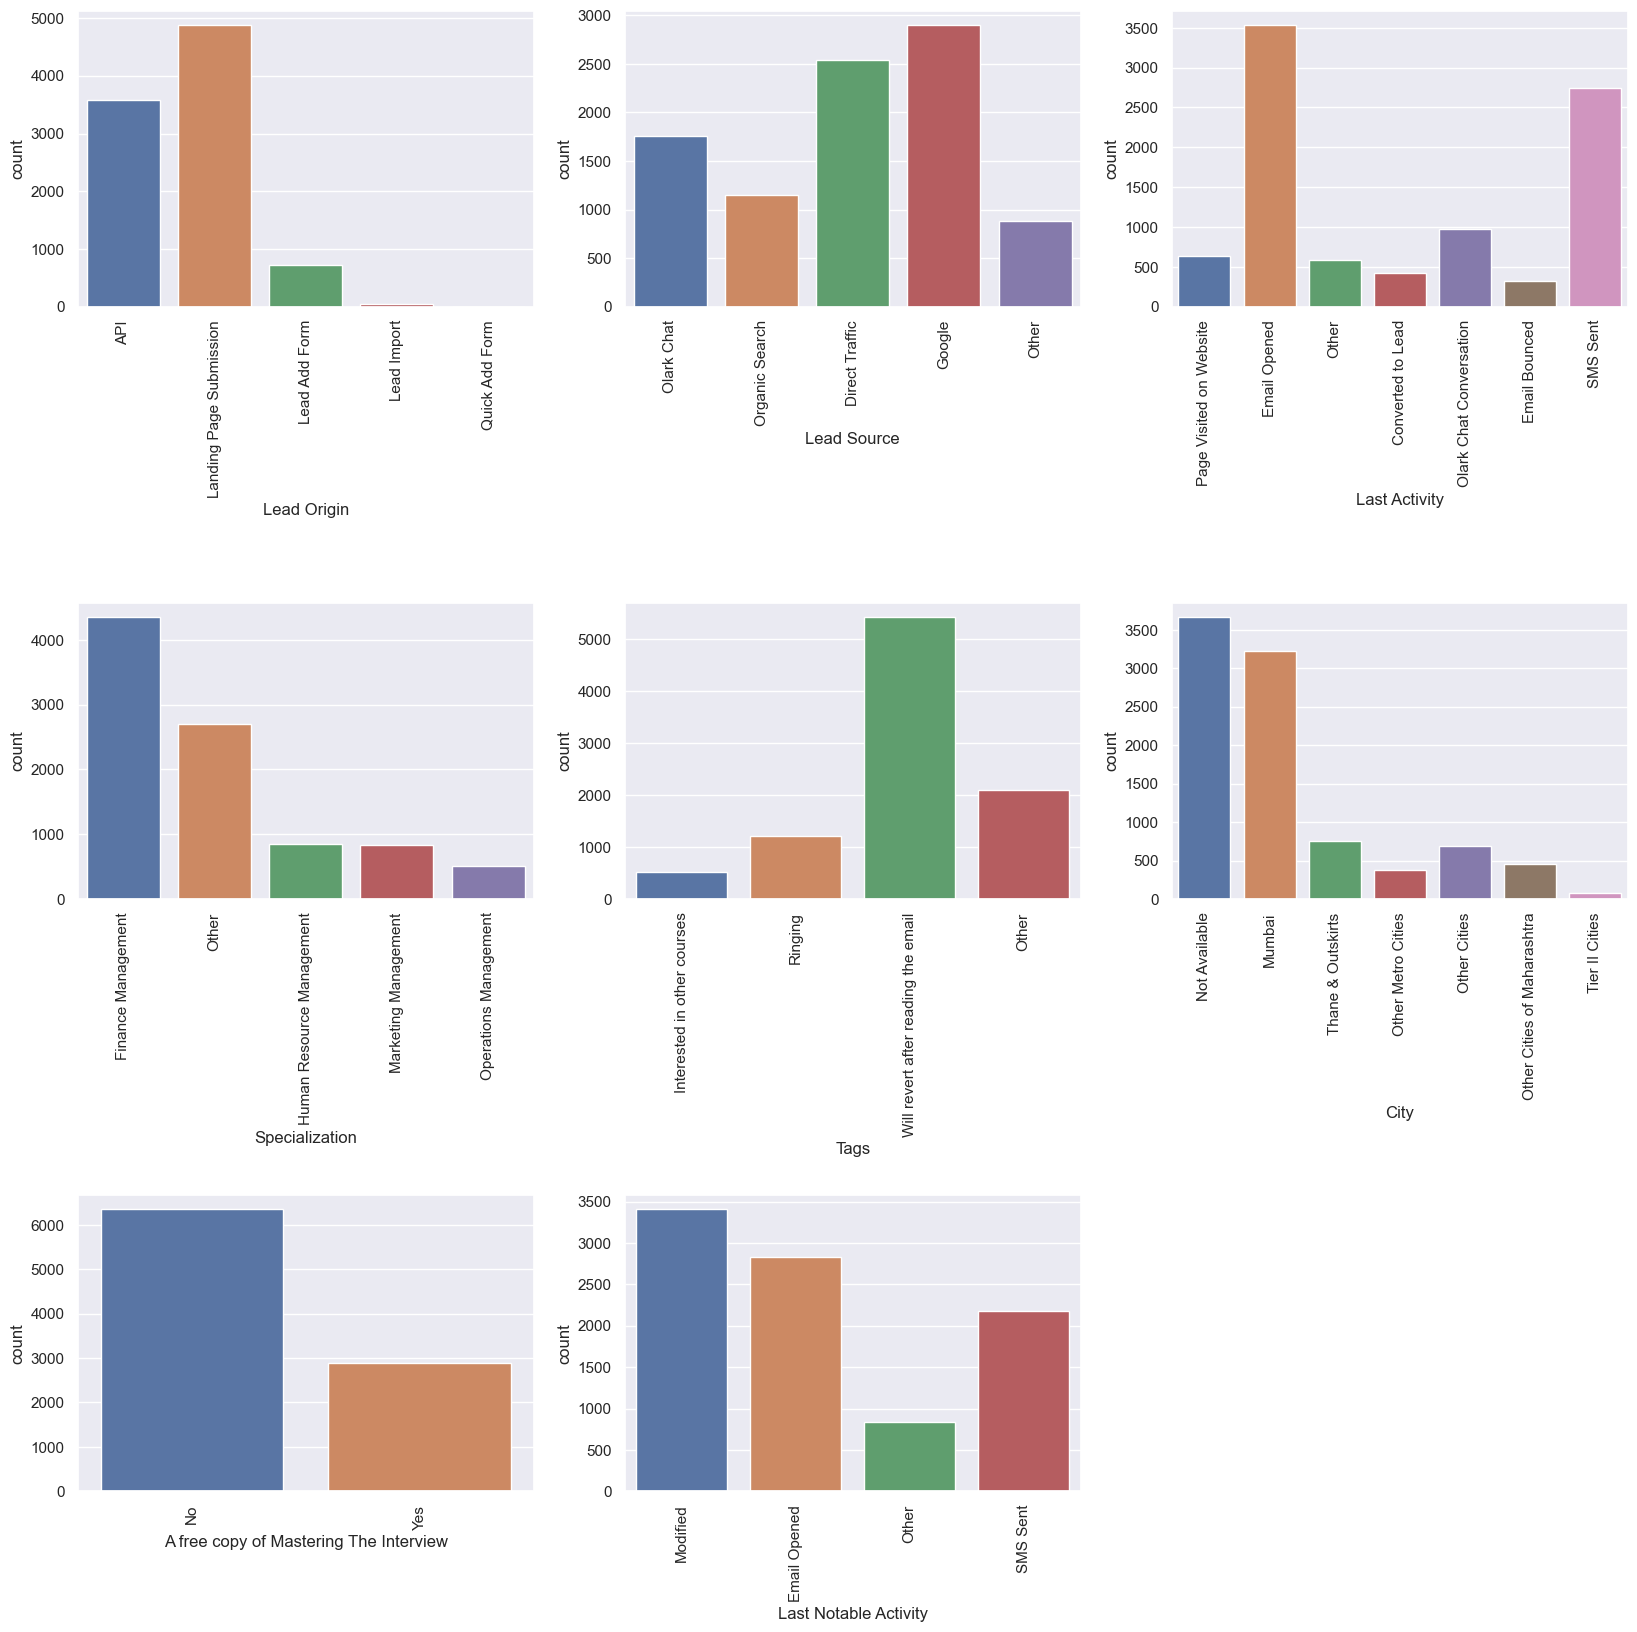

In [42]:
# plotting countplot for object dtype and understand the data distribution. Since we have dropped few columns, let's observe the changes

plt.figure(figsize=(20,50))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1 )
for i in enumerate(obj_fields):
    plt.subplot(7,3, i[0]+1)
    sns.countplot(x = i[1], data=lead_df) 
    plt.xticks(rotation=90)
plt.show()

##### Observation:
1. Lead Origin - Landing page submission and API are the main lead origins.
2. Lead Source - Direct Traffic and Google are the main lead sources.
3. Last Activity - Number of emailes opened and SMS sent has more number of last activity.
4. Specialization - Most of the people choose Finance management as specialization.
5. Tags - Will revert after readig the email is the highest among the column tag.
6. City - There were many null values but Mumbai city has maximum value.
7. A free copy of mastering the interview - Majority of people choose "No".
8. Last Notable Activity - Modified are high in numbers followed by Email Opened.

### Univariate Analysis - Numerical Columns

In [43]:
#For bivariate analysis, we would need to extract the numerical columns

num_fields = [cols for cols in lead_df.columns if cols not in obj_fields]
num_fields

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [44]:
#Checking the value counts for Converted column

lead_df['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

In [45]:
#Converted is target column with two levels 0 and 1. Hence, the columns would be significant in numerical columns analysis

num_fields.remove('Converted')

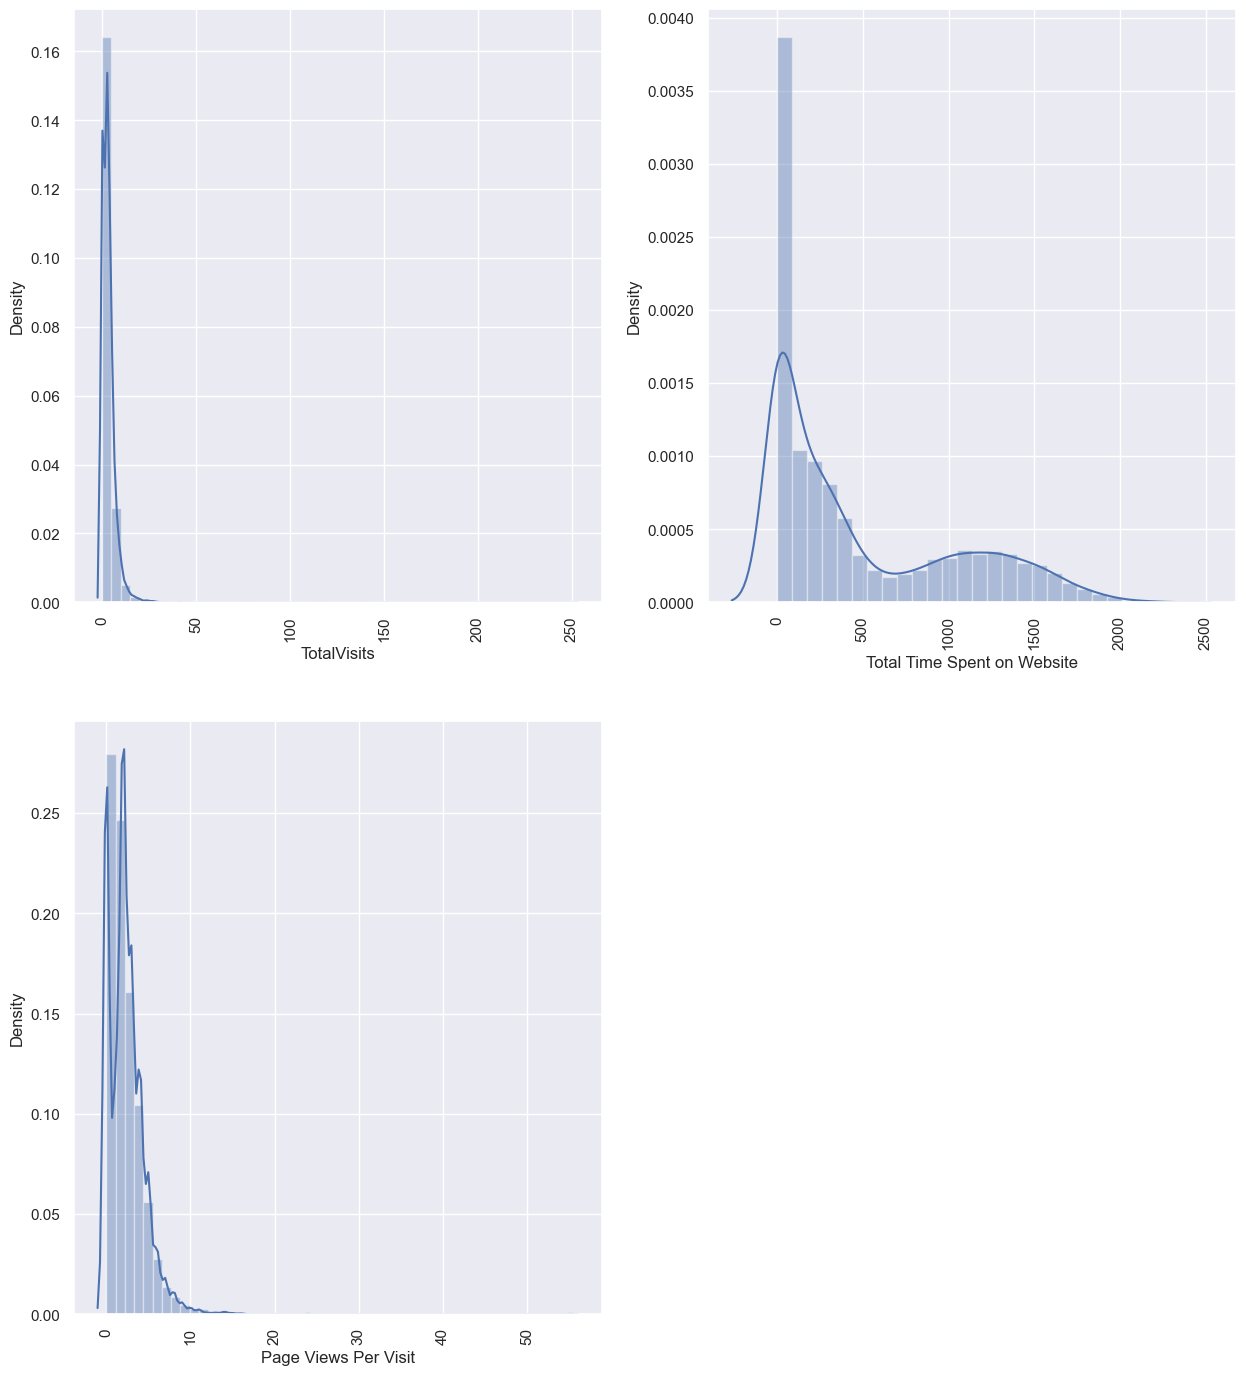

In [46]:
# plotting distplot for numeric dtype columns to understand the data distribution

plt.figure(figsize=(15,15))
plt.subplots_adjust(bottom=.01)
for i in enumerate(num_fields):    
    plt.subplot(2, 2, i[0]+1)
    sns.distplot(lead_df[i[1]])    
    plt.xticks(rotation=90)
plt.show()

##### Observation:
- None of the continuous variables are in Normal distribution
- Total visits has more values between 0-50 and page views per visit ranges between 0-20

#### Bivariate Analysis - Categorical Columns

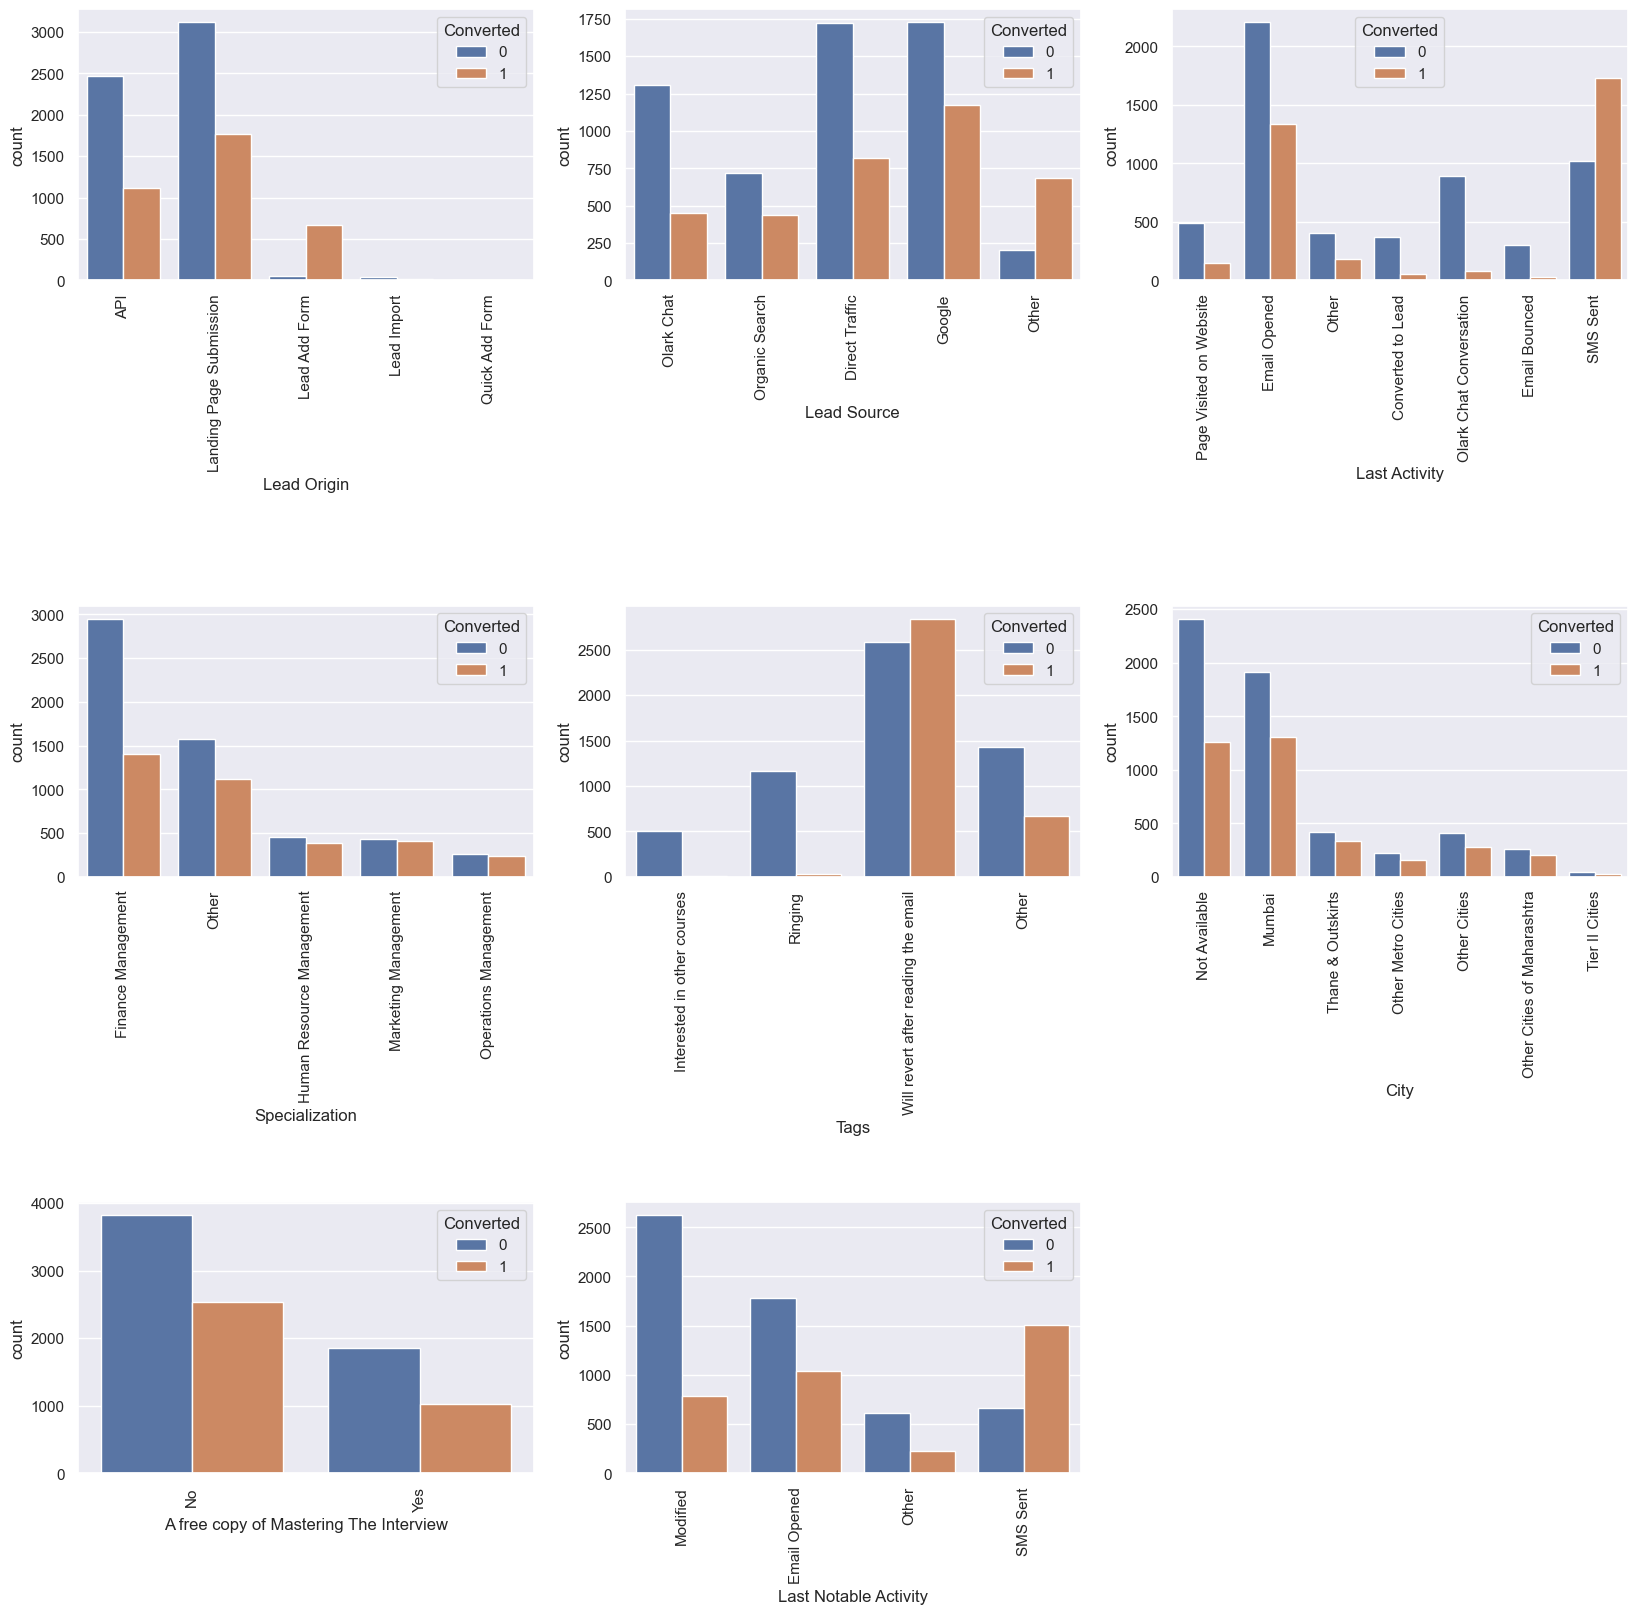

In [47]:
#Creating a countplot for categorical columns with respect to target variable: Converted

plt.figure(figsize = [20,50])
plt.subplots_adjust(wspace=0.2,hspace=1.2 )
for i in enumerate(obj_fields):
    plt.subplot(7,3, i[0]+1)
    sns.countplot(x = i[1],hue = 'Converted', data = lead_df)
    plt.xticks(rotation=90)
plt.show()

##### Observation:
- Lead origin - API and Landing page submission has high hot leads
- Lead Source - The number of Hot leads is higher in Direct Traffic and Google as compared to other categories.
- Specialization - Most of the leads comes from Finance management but here Hot leads are lesseer than Cold leads.
- Last Activity - The number of hot leads are higher in SMS Sent. In Email Opened, cold leads are higher than hot leads.
- Last Notable Activity - Same behaviour as Last Activity column
- City - The reponse from Mumbai is high. It has maximum hot leads

## Data Preparation and Feature Selection

In [48]:
#Replacing Yes/No in column: A free copy of Mastering The Interview with 1 and 0

lead_df['A free copy of Mastering The Interview'] = lead_df['A free copy of Mastering The Interview'].apply(lambda x : 1 if x == 'Yes' else 0 )

##### As per the observation, "Last Activity" and "Last Notable Activity" represents similar activity. Hence dropping the column: "Last Notable Activity"

In [49]:
#Dropping  column: Last Notable Activity

lead_df.drop("Last Notable Activity", axis=1, inplace=True)

In [50]:
lead_df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Tags,City,A free copy of Mastering The Interview
Lead Number,,,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,Interested in other courses,Not Available,0
660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,Ringing,Not Available,0
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Other,Will revert after reading the email,Mumbai,1
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Other,Ringing,Mumbai,0
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,Will revert after reading the email,Mumbai,0


#### Creating Dummy Variables

In [51]:
#Creating dummy variables for columns: 'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'Tags', 'City'

dummy_columns = pd.get_dummies(lead_df[['Lead Origin','Lead Source','Last Activity',
                                        'Specialization','Tags','City']], drop_first = True)
dummy_columns.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Last Activity_Email Bounced,Last Activity_Email Opened,...,Specialization_Other,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,City_Not Available,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
660728,0,0,0,0,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
660727,1,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
660719,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
660681,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [52]:
#Concating the dummy variables to master dataframe

lead_df = pd.concat([lead_df,dummy_columns], axis = 1)

In [53]:
lead_df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Tags,City,...,Specialization_Other,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,City_Not Available,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,Interested in other courses,Not Available,...,0,0,0,0,1,0,0,0,0,0
660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,Ringing,Not Available,...,0,0,1,0,1,0,0,0,0,0
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Other,Will revert after reading the email,Mumbai,...,1,0,0,1,0,0,0,0,0,0
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Other,Ringing,Mumbai,...,1,0,1,0,0,0,0,0,0,0
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,Will revert after reading the email,Mumbai,...,0,0,0,1,0,0,0,0,0,0


##### Dropping the repeated variables

In [54]:
#Since the dummy columns have been created, we would need to drop columns: 'Lead Origin','Lead Source','Last Activity','Specialization','Tags','City'

lead_df = lead_df.drop(['Lead Origin','Lead Source','Last Activity',
                                        'Specialization','Tags','City'], axis = 1)

In [55]:
lead_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,...,Specialization_Other,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,City_Not Available,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
660728,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
660727,1,2.0,1532,2.0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
660719,0,1.0,305,1.0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
660681,1,2.0,1428,1.0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


### Train Test Split

In [56]:
#Creating train and test data set from the master dataset: lead_df

X = lead_df.drop(['Converted'],axis = 1)
y = lead_df[['Converted']]

In [57]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,...,Specialization_Other,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,City_Not Available,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0.0,0,0.0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
660728,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
660727,2.0,1532,2.0,1,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
660719,1.0,305,1.0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
660681,2.0,1428,1.0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [58]:
y.head()

,Converted
Lead Number,
660737,0
660728,0
660727,1
660719,0
660681,1


In [59]:
#Creating train test split from X and y

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = .3,random_state = 1)

### Scaling Features

MinMax Scaler shrinks the data within the given range, usually of 0 to 1. It transforms data by scaling features to a given range. It scales the values to a specific value range without changing the shape of the original distribution.

        x = x - min(x) / max(x) - min(x)

In [60]:
#Scaling the columns: 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'

scaler = MinMaxScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,...,Specialization_Other,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,City_Not Available,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
Lead Number,,,,,,,,,,,,,,,,,,,,,
609431,0.039841,0.158451,0.045455,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
631817,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
596164,0.007968,0.003081,0.036364,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
646570,0.015936,0.033451,0.036364,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
643974,0.007968,0.042254,0.036364,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0


#### Correlation between features

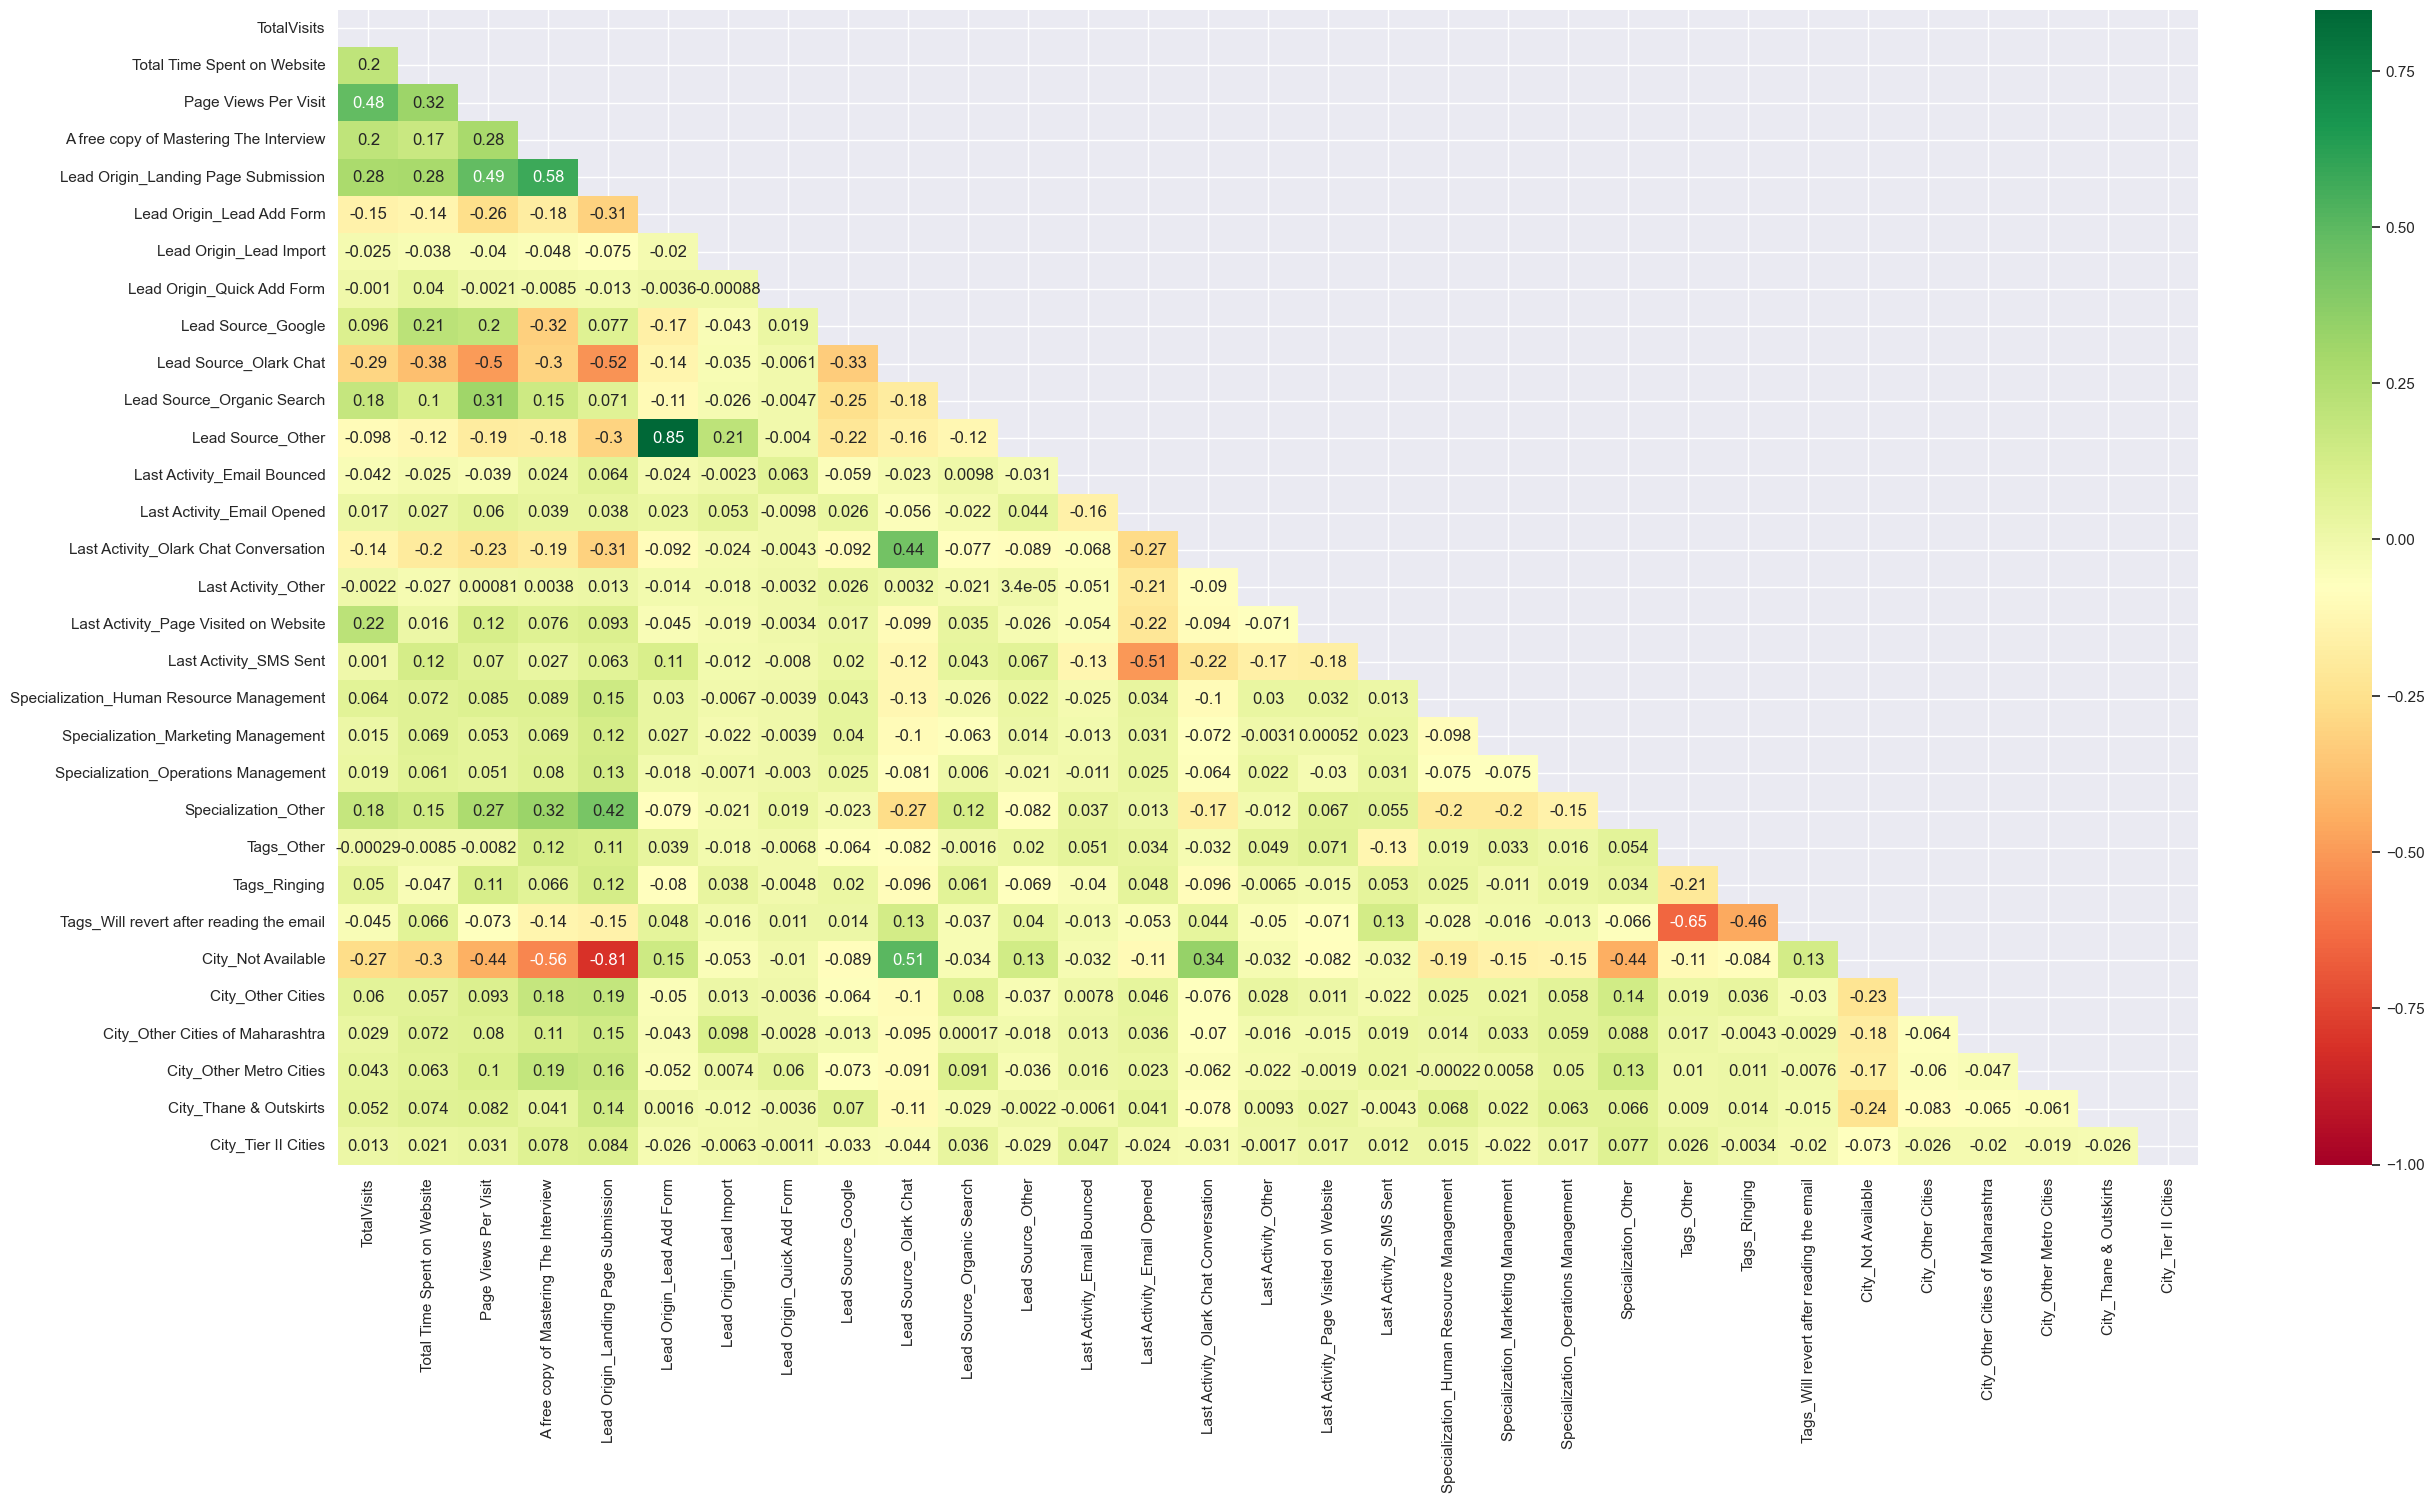

In [61]:
#Checking the correlation between the features through heatmap

plt.figure(figsize = (30, 15))
df_zero = np.zeros(X_train.corr().shape, dtype=bool)
df_zero[np.triu_indices(len(df_zero))] = True
sns.heatmap(X_train.corr(), annot = True, cmap='RdYlGn', vmin=-1,mask=df_zero)
plt.show()

### Recursive Feature Elimination
RFE iteratively removes less important features, creating a subset that maximizes predictive accuracy.

In [62]:
logreg = LogisticRegression()

In [63]:
rfe = RFE(logreg)
rfe = rfe.fit(X_train, y_train)

In [64]:
rfe.support_

array([ True,  True,  True, False,  True,  True,  True, False, False,
        True, False, False,  True,  True,  True, False, False,  True,
       False, False, False, False,  True,  True,  True,  True, False,
       False, False, False, False])

In [65]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 17),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 13),
 ('Lead Source_Google', False, 5),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 6),
 ('Lead Source_Other', False, 4),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other', False, 2),
 ('Last Activity_Page Visited on Website', False, 3),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Human Resource Management', False, 9),
 ('Specialization_Marketing Management', False, 8),
 ('Specialization_Operations Management', False, 7),
 ('Specialization_Other', False, 10),
 ('Tags_Other', True, 1),
 ('Tags_Ringing', Tru

In [66]:
#Extracting the columns ranked 1 by RFE. Only these columns would be used for modelling

cols = X_train.columns[rfe.support_]
cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Tags_Other', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'City_Not Available'],
      dtype='object')

### Building Logistic Regression Model

In [67]:
#Creating logistic regression model with statsmodel.api

X_train_sm = sm.add_constant(X_train[cols])
log_model_1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_model_1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2371.1
Date:                Sat, 16 Sep 2023   Deviance:                       4742.1
Time:                        21:17:07   Pearson chi2:                 7.35e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4491
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.2019      0.439    -11.862      0.000      -6.061      -4.342
TotalVisits                                  8.2348      2.290      3.596      0.000       3.747      12.722
Total Time Spent on Website                  4.8559      0.185     26.183      0.000       4.492       5.219
Page Views Per Visit                        -2.5141      1.294     -1.943      0.052      -5.051       0.022
Lead Origin_Landing Page Submission         -0.8224      0.147     -5.613      0.000      -1.110      -0.535
Lead Origin_Lead Add Form                    4.1423      0.234     17.670      0.000       3.683       4.602
Lead Origin_Lead Import                     -0.6637      0.572     -1.160      0.246      -1.785       0.458
Lead Source_Olark Chat                       0.8747      0.139      6.308      0.000       0.603       1.147
Last Activity_Email Bounced                 -1.4589      0.302     -4.838      0.000      -2.050      -0.868
Last Activity_Email Opened                   0.6055      0.104      5.810      0.000       0.401       0.810
Last Activity_Olark Chat Conversation       -1.2789      0.191     -6.690      0.000      -1.654      -0.904
Last Activity_SMS Sent                       1.8802      0.112     16.824      0.000       1.661       2.099
Tags_Other                                   2.9502      0.409      7.216      0.000       2.149       3.752
Tags_Ringing                                -0.6375      0.462     -1.378      0.168      -1.544       0.269
Tags_Will revert after reading the email     3.9194      0.405      9.666      0.000       3.125       4.714
City_Not Available                          -0.9530      0.140     -6.786      0.000      -1.228      -0.678
============================================================================================================
"""

##### Variable: Lead Origin_Lead Import has high p-value. Hence, dropping the column and building the model

In [68]:
#Dropping the column: Lead Origin_Lead Import

cols = cols.drop(['Lead Origin_Lead Import'],1)

In [69]:
X_train_sm = sm.add_constant(X_train_sm[cols])
log_model_2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_model_2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2371.8
Date:                Sat, 16 Sep 2023   Deviance:                       4743.5
Time:                        21:17:07   Pearson chi2:                 7.38e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4490
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.2490      0.436    -12.028      0.000      -6.104      -4.394
TotalVisits                                  8.3110      2.324      3.577      0.000       3.757      12.865
Total Time Spent on Website                  4.8715      0.185     26.322      0.000       4.509       5.234
Page Views Per Visit                        -2.3886      1.285     -1.859      0.063      -4.907       0.130
Lead Origin_Landing Page Submission         -0.7822      0.142     -5.502      0.000      -1.061      -0.504
Lead Origin_Lead Add Form                    4.1704      0.233     17.885      0.000       3.713       4.627
Lead Source_Olark Chat                       0.8981      0.137      6.549      0.000       0.629       1.167
Last Activity_Email Bounced                 -1.4617      0.302     -4.845      0.000      -2.053      -0.870
Last Activity_Email Opened                   0.6012      0.104      5.772      0.000       0.397       0.805
Last Activity_Olark Chat Conversation       -1.2807      0.191     -6.702      0.000      -1.655      -0.906
Last Activity_SMS Sent                       1.8744      0.112     16.790      0.000       1.656       2.093
Tags_Other                                   2.9478      0.408      7.217      0.000       2.147       3.748
Tags_Ringing                                -0.6429      0.462     -1.391      0.164      -1.549       0.263
Tags_Will revert after reading the email     3.9153      0.405      9.666      0.000       3.121       4.709
City_Not Available                          -0.9181      0.137     -6.707      0.000      -1.186      -0.650
============================================================================================================
"""

In [70]:
#Dropping the column: "Tags_Ringing" as it has high  p-value

cols = cols.drop(['Tags_Ringing'],1)

In [71]:
#Creating logistic regression model with updated columns

X_train_sm = sm.add_constant(X_train_sm[cols])
log_model_3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_model_3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2372.7
Date:                Sat, 16 Sep 2023   Deviance:                       4745.3
Time:                        21:17:07   Pearson chi2:                 7.33e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4488
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.7445      0.278    -20.674      0.000      -6.289      -5.200
TotalVisits                                  8.5088      2.205      3.859      0.000       4.187      12.830
Total Time Spent on Website                  4.8701      0.185     26.320      0.000       4.507       5.233
Page Views Per Visit                        -2.4210      1.274     -1.900      0.057      -4.918       0.076
Lead Origin_Landing Page Submission         -0.7933      0.142     -5.582      0.000      -1.072      -0.515
Lead Origin_Lead Add Form                    4.1677      0.233     17.892      0.000       3.711       4.624
Lead Source_Olark Chat                       0.8995      0.137      6.558      0.000       0.631       1.168
Last Activity_Email Bounced                 -1.4603      0.302     -4.839      0.000      -2.052      -0.869
Last Activity_Email Opened                   0.6018      0.104      5.773      0.000       0.397       0.806
Last Activity_Olark Chat Conversation       -1.2795      0.191     -6.690      0.000      -1.654      -0.905
Last Activity_SMS Sent                       1.8681      0.112     16.747      0.000       1.649       2.087
Tags_Other                                   3.4538      0.217     15.946      0.000       3.029       3.878
Tags_Will revert after reading the email     4.4214      0.210     21.011      0.000       4.009       4.834
City_Not Available                          -0.9289      0.137     -6.787      0.000      -1.197      -0.661
============================================================================================================
"""

In [72]:
# Getting the predicted values on the train dataset

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

Lead Number
609431    0.007136
631817    0.067110
596164    0.076745
646570    0.213461
643974    0.011049
614268    0.139835
633399    0.358288
615080    0.734709
627916    0.067110
622276    0.377579
dtype: float64

In [73]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0071364 , 0.06711009, 0.07674488, 0.21346078, 0.01104945,
       0.13983506, 0.3582877 , 0.73470892, 0.06711009, 0.37757895])

##### Creating a dataframe with the converted values and the predicted probabilities

In [74]:
#Creating dataframe with columns: 'Converted','Converted_Prob','Lead Number'

y_train_pred_final = pd.DataFrame({'Converted':y_train['Converted'], 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.reset_index(drop=True, inplace=True)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.007136,609431
1,0,0.067110,631817
2,0,0.076745,596164
3,0,0.213461,646570
4,0,0.011049,643974


##### Creating a new column: "Predicted" with value 1 if Converted_Prob > 0.5 else 0

In [75]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

#Checking the head of the dataframe y_train_pred_final
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Predicted
0,0,0.007136,609431,0
1,0,0.067110,631817,0
2,0,0.076745,596164,0
3,0,0.213461,646570,0
4,0,0.011049,643974,0


##### Creating the confusion matrix 

In [76]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3590  412]
 [ 560 1906]]


In [77]:
#Checking the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.849721706864564


### Variance Inflation Factor (VIF)

In [78]:
#Creating function to calculate VIF

def vif_calculate(vif_col):
    vif = pd.DataFrame()
    vif['Features'] = vif_col.columns
    vif['VIF'] = [variance_inflation_factor(vif_col.values, i) for i in range(vif_col.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [79]:
#Calculating VIF for the training set

vif_calculate(X_train[cols])

,Features,VIF
3,Lead Origin_Landing Page Submission,4.50
11,Tags_Will revert after reading the email,3.84
2,Page Views Per Visit,3.79
12,City_Not Available,3.28
7,Last Activity_Email Opened,2.77
9,Last Activity_SMS Sent,2.58
5,Lead Source_Olark Chat,2.52
1,Total Time Spent on Website,2.24
10,Tags_Other,2.05
0,TotalVisits,1.89


##### From the above dataframe with VIF values, we could observe that no features has VIF value greater than 5. Hence, no column needed to be dropped based on the VIF score

In [80]:
#From the last model: log_model_3, viewing the summary of the logistic regression

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2372.7
Date:                Sat, 16 Sep 2023   Deviance:                       4745.3
Time:                        21:17:08   Pearson chi2:                 7.33e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4488
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.7445      0.278    -20.674      0.000      -6.289      -5.200
TotalVisits                                  8.5088      2.205      3.859      0.000       4.187      12.830
Total Time Spent on Website                  4.8701      0.185     26.320      0.000       4.507       5.233
Page Views Per Visit                        -2.4210      1.274     -1.900      0.057      -4.918       0.076
Lead Origin_Landing Page Submission         -0.7933      0.142     -5.582      0.000      -1.072      -0.515
Lead Origin_Lead Add Form                    4.1677      0.233     17.892      0.000       3.711       4.624
Lead Source_Olark Chat                       0.8995      0.137      6.558      0.000       0.631       1.168
Last Activity_Email Bounced                 -1.4603      0.302     -4.839      0.000      -2.052      -0.869
Last Activity_Email Opened                   0.6018      0.104      5.773      0.000       0.397       0.806
Last Activity_Olark Chat Conversation       -1.2795      0.191     -6.690      0.000      -1.654      -0.905
Last Activity_SMS Sent                       1.8681      0.112     16.747      0.000       1.649       2.087
Tags_Other                                   3.4538      0.217     15.946      0.000       3.029       3.878
Tags_Will revert after reading the email     4.4214      0.210     21.011      0.000       4.009       4.834
City_Not Available                          -0.9289      0.137     -6.787      0.000      -1.197      -0.661
============================================================================================================
"""

In [81]:
#Dropping the column: Page Views Per Visit

cols = cols.drop(['Page Views Per Visit'],1)
cols

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Tags_Other',
       'Tags_Will revert after reading the email', 'City_Not Available'],
      dtype='object')

In [82]:
#Creating a logistic model with updated columns

X_train_sm = sm.add_constant(X_train_sm[cols])
log_model_4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_model_4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2374.6
Date:                Sat, 16 Sep 2023   Deviance:                       4749.3
Time:                        21:17:08   Pearson chi2:                 7.35e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4485
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.8325      0.274    -21.317      0.000      -6.369      -5.296
TotalVisits                                  7.2324      1.666      4.341      0.000       3.967      10.498
Total Time Spent on Website                  4.8553      0.185     26.290      0.000       4.493       5.217
Lead Origin_Landing Page Submission         -0.8138      0.141     -5.752      0.000      -1.091      -0.536
Lead Origin_Lead Add Form                    4.2462      0.229     18.534      0.000       3.797       4.695
Lead Source_Olark Chat                       0.9853      0.129      7.621      0.000       0.732       1.239
Last Activity_Email Bounced                 -1.4421      0.302     -4.773      0.000      -2.034      -0.850
Last Activity_Email Opened                   0.5894      0.104      5.674      0.000       0.386       0.793
Last Activity_Olark Chat Conversation       -1.2899      0.191     -6.749      0.000      -1.665      -0.915
Last Activity_SMS Sent                       1.8530      0.111     16.679      0.000       1.635       2.071
Tags_Other                                   3.4606      0.216     16.021      0.000       3.037       3.884
Tags_Will revert after reading the email     4.4165      0.210     21.057      0.000       4.005       4.828
City_Not Available                          -0.9151      0.136     -6.710      0.000      -1.182      -0.648
============================================================================================================
"""

##### From the above summary, we could confirm that P-value of the features does not have value greater than 5%

In [83]:
#Re-confirming the VIF values

vif_calculate(X_train[cols])

,Features,VIF
2,Lead Origin_Landing Page Submission,3.99
10,Tags_Will revert after reading the email,3.82
11,City_Not Available,3.20
6,Last Activity_Email Opened,2.67
8,Last Activity_SMS Sent,2.51
4,Lead Source_Olark Chat,2.36
1,Total Time Spent on Website,2.21
9,Tags_Other,2.05
7,Last Activity_Olark Chat Conversation,1.82
0,TotalVisits,1.59


##### Predicting the Converted_Prob with model: log_model_4

In [84]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00669726, 0.06688096, 0.07421906, 0.2038142 , 0.0113602 ,
       0.14013261, 0.34876735, 0.73184674, 0.06688096, 0.37118239])

In [85]:
#Adding the predicted value to "Converted_Prob" column of y_train_pred_final

y_train_pred_final['Converted_Prob'] = y_train_pred

In [86]:
#Creating a new column: "Predicted" with value 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

#Checking the head of the dataframe y_train_pred_final
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Predicted
0,0,0.006697,609431,0
1,0,0.066881,631817,0
2,0,0.074219,596164,0
3,0,0.203814,646570,0
4,0,0.011360,643974,0


In [87]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8486394557823129


In [88]:
#Creating the confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3587  415]
 [ 564 1902]]


### Other Metrics beyond Accuracy

In [89]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [90]:
#Checking the sensitivity of logistic regression model: log_model_4

TP / float(TP+FN)

0.7712895377128953

In [91]:
#Checking the specificity of logistic regression model: log_model_4

TN / float(TN+FP)

0.8963018490754623

In [92]:
#Checking the False predictive value: predicted as converted when the lead does not have converted

print(FP/ float(TN+FP))

0.10369815092453773


In [93]:
#Checking positive predictive value of logistic regression model: log_model_4

print (TP / float(TP+FP))

0.8208890807078119


In [94]:
#Checking negative predictive value of logistic regression model: log_model_4

print (TN / float(TN+ FN))

0.8641291255119249


### Plotting the ROC Curve

#### An ROC curve demonstrates several things:
- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [95]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [96]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

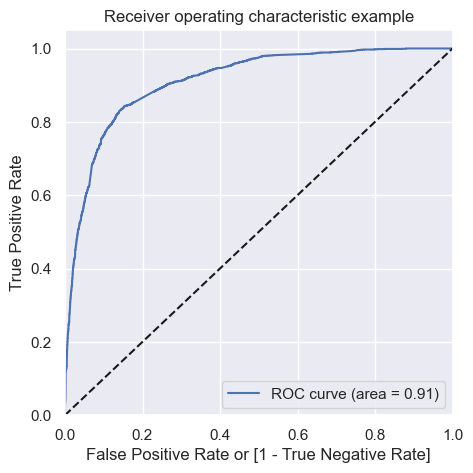

In [97]:
#Calling the function with: y_train_pred_final.Converted, y_train_pred_final.Converted_Prob

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff point

#### Optimal cutoff probability is the probability point where we get balanced sensitivity and specificity

In [98]:
#Creating columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.006697,609431,0,1,0,0,0,0,0,0,0,0,0
1,0,0.066881,631817,0,1,0,0,0,0,0,0,0,0,0
2,0,0.074219,596164,0,1,0,0,0,0,0,0,0,0,0
3,0,0.203814,646570,0,1,1,1,0,0,0,0,0,0,0
4,0,0.011360,643974,0,1,0,0,0,0,0,0,0,0,0


In [99]:
#Calculating accuracy, sensitivity and specificity for various probability cutoffs

cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.381262     1.000000     0.000000
0.1          0.1  0.687384     0.972425     0.511744
0.2          0.2  0.757421     0.931062     0.650425
0.3          0.3  0.807359     0.889700     0.756622
0.4          0.4  0.847248     0.824006     0.861569
0.5          0.5  0.848639     0.771290     0.896302
0.6          0.6  0.838126     0.699919     0.923288
0.7          0.7  0.805813     0.568532     0.952024
0.8          0.8  0.781076     0.473642     0.970515
0.9          0.9  0.735003     0.329684     0.984758


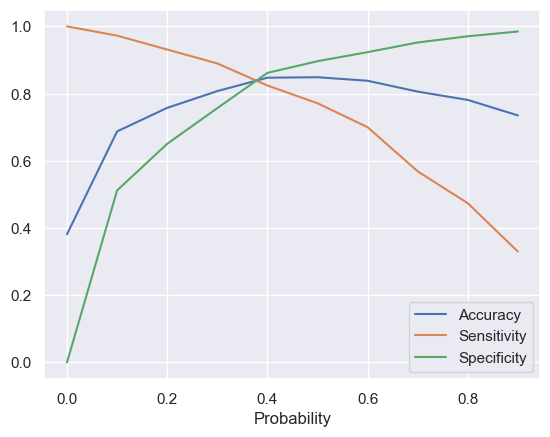

In [100]:
#Plotting accuracy, sensitivity and specificity for various probabilities

cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

##### From the above curve, we could observe 0.38  is the optimum point to take it as a cutoff probability.

In [101]:
#Creating a final prediction column with 0.38 as cutoff probability

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.006697,609431,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.066881,631817,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.074219,596164,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.203814,646570,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.011360,643974,0,1,0,0,0,0,0,0,0,0,0,0


In [102]:
#Checking the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8466295609152752

In [103]:
confusion_final = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_final

array([[3417,  585],
       [ 407, 2059]], dtype=int64)

In [104]:
#Extracting true positives, true negatives, false positives and false negatives

TP = confusion_final[1,1] # true positive 
TN = confusion_final[0,0] # true negatives
FP = confusion_final[0,1] # false positives
FN = confusion_final[1,0] # false negatives

In [105]:
#Calculating the sensitivity of logistic regression model

TP / float(TP+FN)

0.8349553933495539

In [106]:
#Calculating the specificity of logistic regression model

TN / float(TN+FP)

0.8538230884557722

In [107]:
#Calculating false postive rate

print(FP/ float(TN+FP))

0.14617691154422788


In [108]:
# Positive predictive value 

print (TP / float(TP+FP))

0.7787443267776096


In [109]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8935669456066946


### Precision & Recall

In [110]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3587,  415],
       [ 564, 1902]], dtype=int64)

#### Precision
TP / TP + FP

In [111]:
#Calculating the precision

precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8208890807078119

#### Recall
TP / TP + FN

In [112]:
#Calculating the recall

recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7712895377128953

### Precision & Recall Tradeoff

In [113]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    0
 6464    0
 6465    0
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    0
 6464    0
 6465    0
 6466    0
 6467    0
 Name: Predicted, Length: 6468, dtype: int64)

In [114]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

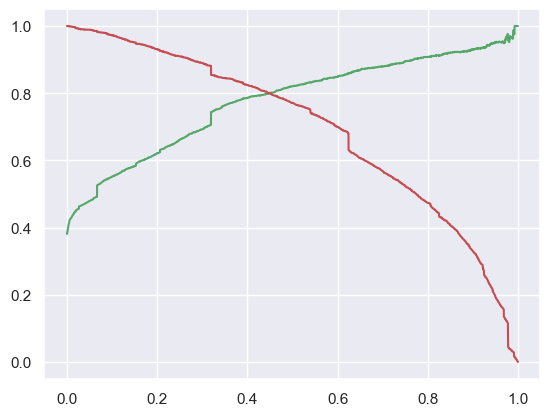

In [115]:
#Plotting precision recall curve to find optimum cutoff

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making Predictions on the Testset

In [116]:
#Scaling the features: 'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website'

X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [117]:
#Assigning columns based on model: log_model_4

X_test = X_test[cols]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Tags_Other,Tags_Will revert after reading the email,City_Not Available
Lead Number,,,,,,,,,,,,
639211,0.000000,0.000000,0,1,0,0,0,0,0,1,0,0
590711,0.015936,0.661532,1,0,0,0,0,0,1,0,1,0
644174,0.011952,0.450704,1,0,0,0,1,0,0,0,1,0
641392,0.007968,0.081866,1,0,0,0,0,0,1,0,0,0
587955,0.051793,0.759243,0,0,0,0,1,0,0,0,1,1


In [118]:
#Adding constant to X_test dataframe

X_test_sm = sm.add_constant(X_test)
X_test_sm.columns

Index(['const', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Tags_Other',
       'Tags_Will revert after reading the email', 'City_Not Available'],
      dtype='object')

In [119]:
#Checking the X_train_sm to compare the columns with X_test_sm

X_train_sm.columns

Index(['const', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Tags_Other',
       'Tags_Will revert after reading the email', 'City_Not Available'],
      dtype='object')

##### Making predictions on test set

In [120]:
#Making predictions on test set with log_model_4

y_test_pred = res.predict(X_test_sm)

In [121]:
# Converting y_test_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [122]:
#Checking the head of y_pred_1

y_pred_1.head()

,0
Lead Number,
639211,0.866962
590711,0.950284
644174,0.653498
641392,0.012892
587955,0.910468


In [123]:
#Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [124]:
#Assigning Lead Number as index to dataframe

y_test_df['Lead Number'] = y_test_df.index

In [125]:
#Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [126]:
#Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [127]:
#Checking the head of y_pred_final

y_pred_final.head()

,Converted,Lead Number,0
0,1,639211,0.866962
1,1,590711,0.950284
2,1,644174,0.653498
3,0,641392,0.012892
4,1,587955,0.910468


In [128]:
#Renaming the column as Converted_Prob

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [129]:
#Checking the head

y_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,1,639211,0.866962
1,1,590711,0.950284
2,1,644174,0.653498
3,0,641392,0.012892
4,1,587955,0.910468


In [130]:
#Making predictions based on optimal cutoff from precision recall tradeoff curve

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [131]:
#Checking the head of dataframe

y_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_predicted
0,1,639211,0.866962,1
1,1,590711,0.950284,1
2,1,644174,0.653498,1
3,0,641392,0.012892,0
4,1,587955,0.910468,1


In [132]:
#Checking the overall accuracy

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8387445887445888

In [133]:
#Creating the confusion matrix for final dataframe

confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1426,  251],
       [ 196,  899]], dtype=int64)

In [134]:
#calculating TP, TN, FP, FN

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [135]:
#Calculating the sensitivity of logistic regression model

TP / float(TP+FN)

0.8210045662100457

In [136]:
#Calculating the specificity of logistic regression model

TN / float(TN+FP)

0.8503279666070364

In [137]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_predicted
0,1,639211,0.866962,1
1,1,590711,0.950284,1
2,1,644174,0.653498,1
3,0,641392,0.012892,0
4,1,587955,0.910468,1


In [138]:
#Assigning a lead score based on the probability

y_pred_final['Lead Score'] = round(y_pred_final['Converted_Prob'] * 100, 2)
y_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_predicted,Lead Score
0,1,639211,0.866962,1,86.70
1,1,590711,0.950284,1,95.03
2,1,644174,0.653498,1,65.35
3,0,641392,0.012892,0,1.29
4,1,587955,0.910468,1,91.05
